202107.txt
Population 1. Amplitude = 65.579  Center =  -1.79 Width =  0.599
Population 2. Amplitude = 106.757  Center =  -0.43 Width =  0.332


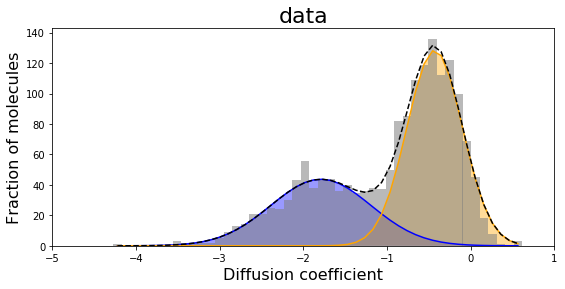

In [3]:
# Load raw files, plots the histogram, fits with two gaussian


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import scipy as scipy
from scipy import optimize
from statistics import mean
from matplotlib import gridspec

%matplotlib inline
from numpy import loadtxt


file = "202107"

# Import data from a txt array. 

filename = "%s.txt" % file
print(filename)
lines = loadtxt(filename, comments="#", delimiter="\t")
nplines = np.array(lines)
#print (lines)
#print (nplines)
interval = 0.1
nbbins = int((nplines.max()-nplines.min())/interval)
#print( bins)



np.histogram(nplines, bins=nbbins)
  
hist, bins = np.histogram(nplines, bins=nbbins) 
  
# printing histogram
#print()
#print (hist) 
#print (len(hist))
#print (bins) 
#print (len(bins))
#print()
corrbins=bins[:-1]+(interval/2)
#print (corrbins) 
#print (len(corrbins))

# each gaussian is defined by its amplitude, center and sigma


def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((corrbins-cen1)/sigma1)**2)))

def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((corrbins-cen1)/sigma1)**2))) + \
          amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((corrbins-cen2)/sigma2)**2)))

#def _3gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3):
 #   return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen1)/sigma1)**2))) + \
  #          amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen2)/sigma2)**2))) + \
   #         amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen3)/sigma3)**2)))

# This is the fitting procedure for the average, where guess are the initial guesses, and limits the acceptable bounds for each parameter 
# defined in _2gaussian

guess = [10,-2,.5, 10,0,.5]
limits = ((0,-5,0,0,-1.5,0), (1000, -1, .6, 1000, 1, .6))

popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, corrbins, hist, p0=guess, bounds = limits)
                                        

perr_2gauss = np.sqrt(np.diag(pcov_2gauss))

# This calaculates the individual gaussians for plotting
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]

gauss_peak_1 = _1gaussian(corrbins, *pars_1)
gauss_peak_2 = _1gaussian(corrbins, *pars_2)


#Plot Figure

fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1,1)

ax1 = fig.add_subplot(gs[0])
ax1.bar(corrbins, hist, width = 0.102, capsize=3, align='center',alpha=0.55, ecolor='grey',color='grey')

#print (moyenne)

ax1.plot(corrbins, gauss_peak_1, "blue")
ax1.fill_between(corrbins, gauss_peak_1.min(), gauss_peak_1, facecolor="blue", alpha=0.4)
  
ax1.plot(corrbins, gauss_peak_2, "orange")
ax1.fill_between(corrbins, gauss_peak_2.min(), gauss_peak_2, facecolor="orange", alpha=0.4)  
plt.xlim([-5,1])

ax1.plot(corrbins, _2gaussian(corrbins, *popt_2gauss), 'k--')
ax1.set_title("data", fontsize=22)
ax1.set_xlabel('Diffusion coefficient', fontsize=16)
ax1.set_ylabel('Fraction of molecules', fontsize=16)

figurename = "%s.png" % file

#print(pars_1,pars_2)
print ("Population 1. Amplitude =",round (popt_2gauss[0],3)," Center = ",round (popt_2gauss[1],3), "Width = ",round (popt_2gauss[2],3))
print ("Population 2. Amplitude =",round (popt_2gauss[3],3)," Center = ",round (popt_2gauss[4],3), "Width = ",round (popt_2gauss[5],3))
                